In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Car ID,Company,Model,Manufacture,Transmission,Travelled,Fuel,GST,Mileage,Engine,Price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990


## EDA

In [4]:
#check for missing values
train.isnull().sum()

Car ID          0
Company         0
Model           0
Manufacture     0
Transmission    0
Travelled       0
Fuel            0
GST             0
Mileage         0
Engine          0
Price           0
dtype: int64

c:\Users\TAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


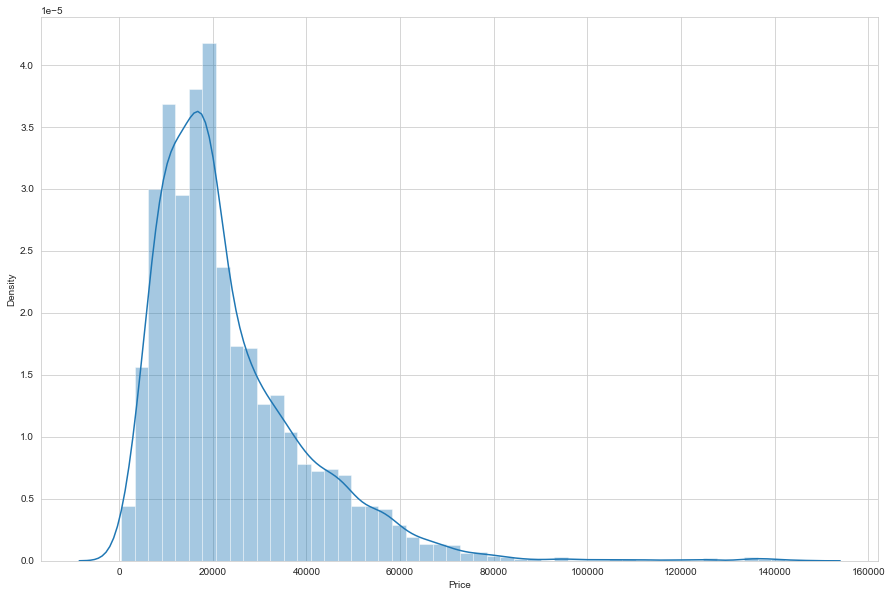

In [110]:
#check for the distribution of the target variable
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(train.Price)
plt.show()

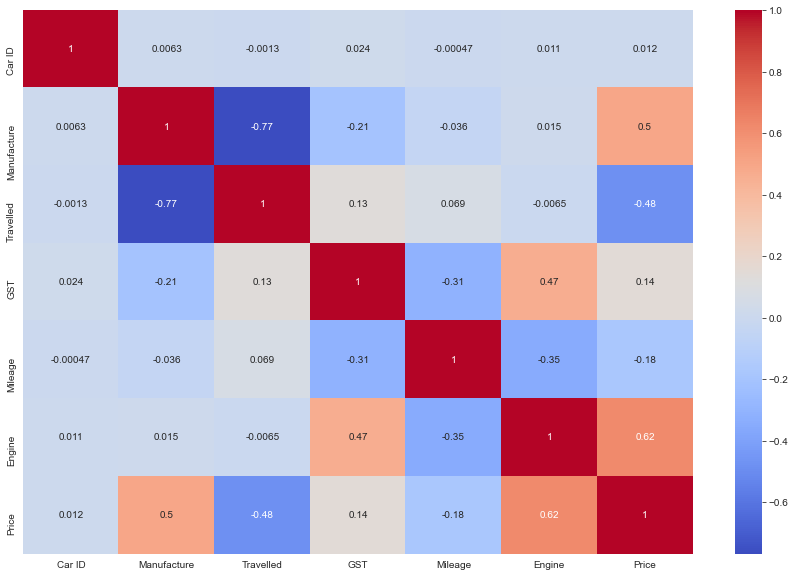

In [111]:
#check for correlation among all the features
plt.figure(figsize=(15,10))
correlations = train.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [112]:
train.Company.value_counts()

merc        790
vw          768
ford        766
bmw         638
hyundi      511
toyota      446
skoda       425
audi        343
vauxhall    273
Name: Company, dtype: int64

<AxesSubplot:xlabel='Fuel', ylabel='count'>

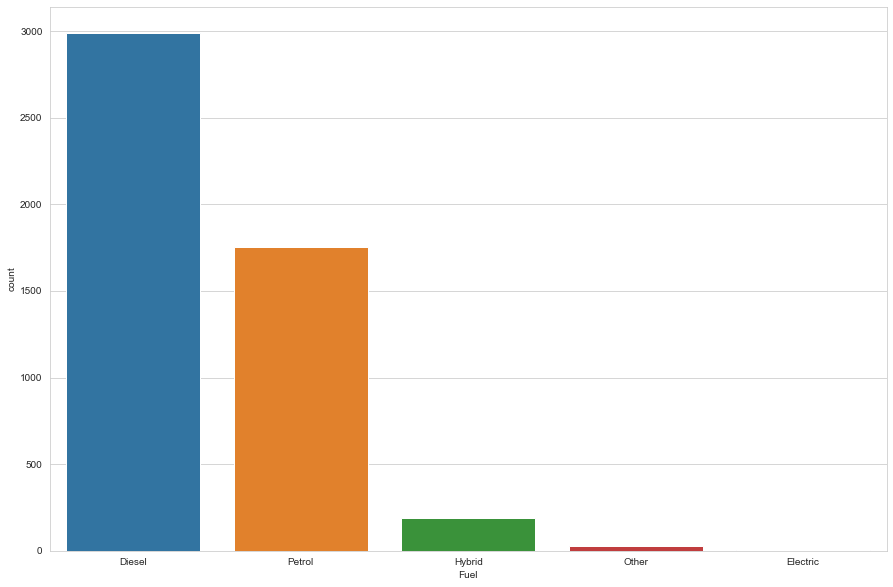

In [113]:
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(x='Fuel',data=train)

<AxesSubplot:xlabel='Company', ylabel='Mileage'>

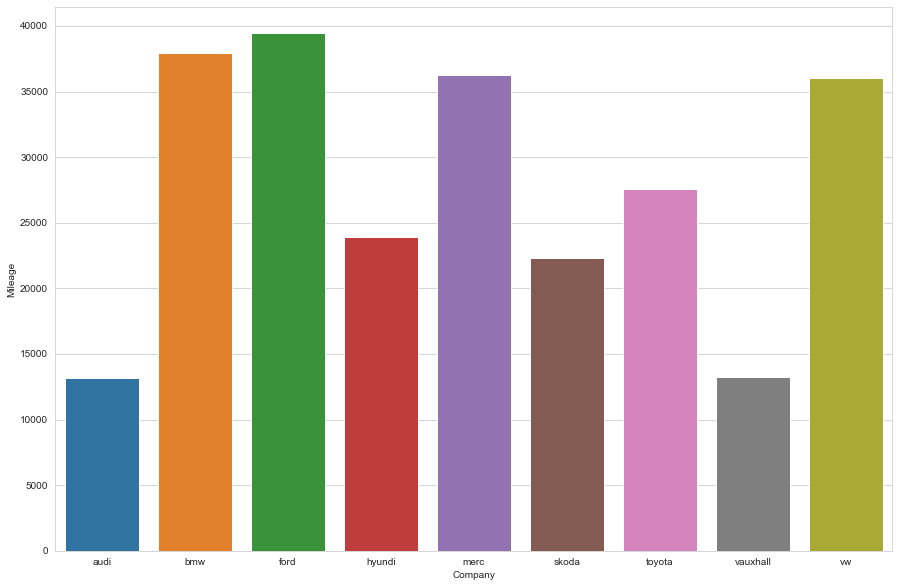

In [114]:
#Comparing the mileage of car companies
df2 = train.groupby('Company')['Mileage'].sum().reset_index()
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(x='Company',y='Mileage',data=df2)

From the above graph we see that Ford has higher mileage as compared to Mercedes and VW despite having a low count from the other two.

In [116]:
train.Fuel.value_counts()

Diesel      2989
Petrol      1754
Hybrid       189
Other         26
Electric       2
Name: Fuel, dtype: int64

<AxesSubplot:xlabel='Company', ylabel='count'>

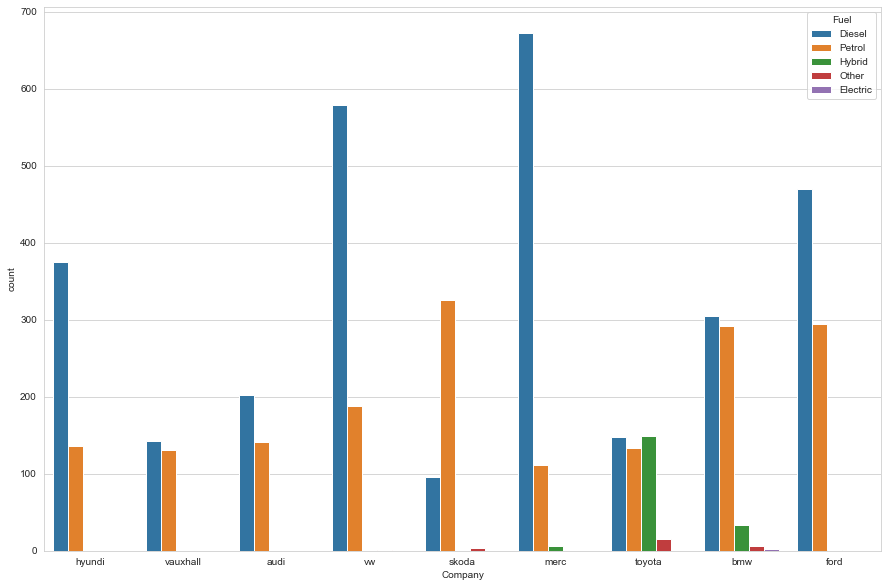

In [117]:
#Lets check the fuel preference according to the car company
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(x='Company',hue='Fuel',data=train)

In [5]:
#Dropping 'Car ID' column as it won't contribute in making predictions
train.drop('Car ID',axis=1,inplace=True)

In [6]:
train.head()

,Company,Model,Manufacture,Transmission,Travelled,Fuel,GST,Mileage,Engine,Price
0,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990


## Label Encoding Categorical variables

In [120]:
#creating a list of categorical columns
colname = []
for x in train.columns:
    if train[x].dtype=='object':
        colname.append(x)
colname

['Company', 'Model', 'Transmission', 'Fuel']

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

for x in colname:
    train[x]=le.fit_transform(train[x])

In [122]:
train.head()

,Company,Model,Manufacture,Transmission,Travelled,Fuel,GST,Mileage,Engine,Price
0,3,69,2019,3,4223,0,145,39.8,2.2,31995
1,7,30,2015,1,47870,0,125,60.1,2.0,7700
2,0,58,2019,0,5151,4,145,29.1,2.9,58990
3,8,71,2016,0,20423,0,30,57.6,2.0,12999
4,5,70,2020,3,3569,4,145,47.1,1.0,16990


From the above graph, we notice that Skoda is the only car company where people prefer Petrol rather than Diesel

## Split the data into Train and Validation set

In [123]:
X = train[['Company', 'Model', 'Manufacture', 'Transmission',
       'Travelled', 'Fuel', 'GST', 'Mileage', 'Engine']]

y = train['Price']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Model Building

Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [126]:
lr_pred = lr.predict(X_test)
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test, lr_pred))
print('MSE: ',metrics.mean_squared_error(y_test, lr_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('R-squared: ',metrics.r2_score(y_test, lr_pred))

MAE:  6521.788586933703
MSE:  105058760.51228374
RMSE:  10249.817584341867
R-squared:  0.6433589660979959


Decision Tree Regressor

In [127]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [128]:
dtree_pred = dtree.predict(X_test)
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test, dtree_pred))
print('MSE: ',metrics.mean_squared_error(y_test, dtree_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, dtree_pred)))
print('R-squared: ',metrics.r2_score(y_test, dtree_pred))

MAE:  2709.6532258064517
MSE:  30819896.75
RMSE:  5551.5670535444315
R-squared:  0.895376265738564


Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [130]:
rf_pred = rf.predict(X_test)
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:',metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R-squared:',metrics.r2_score(y_test, rf_pred))

MAE: 2179.0069436338135
MSE: 21131462.29716015
RMSE: 4596.897029210047
R-squared: 0.9282654152326569


Out of all the regression models, we can conclude that Random Forest Regressor performs the best as it has the lowest RMSE score and highest R-squared value.

Text(0.5, 0, 'Random Forest Feature Importance')

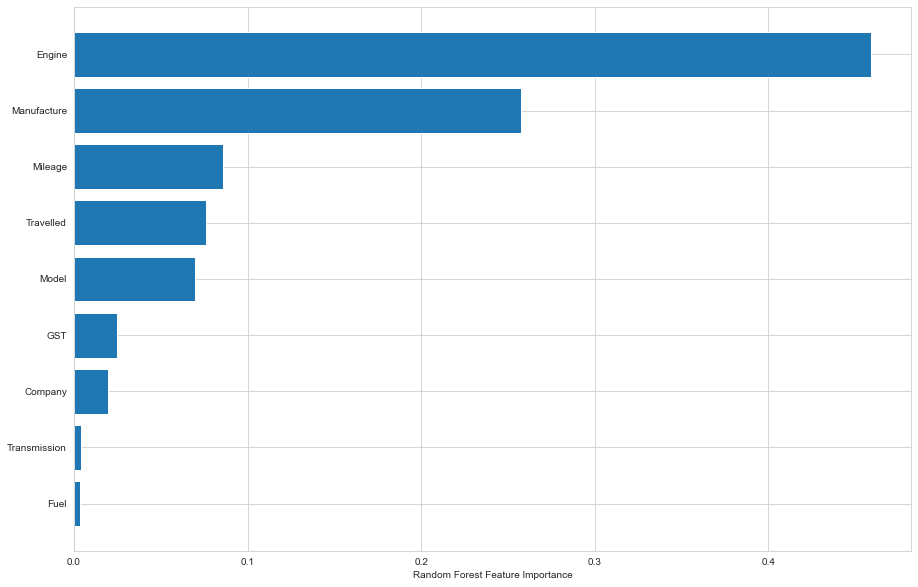

In [131]:
#Insights from the model on which factor contributes how much to the price
fig,ax = plt.subplots(figsize=(15,10))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Performing the predictions on Test Data

In [132]:
test.head()

,Car ID,Company,Model,Manufacture,Transmission,Travelled,Fuel,GST,Mileage,Engine
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325,29.4,4.0


In [133]:
df = pd.DataFrame.copy(test)

In [134]:
for x in colname:
    df[x]=le.fit_transform(df[x])

In [137]:
df.drop('Car ID',axis=1,inplace=True)

In [138]:
df.head()

,Company,Model,Manufacture,Transmission,Travelled,Fuel,GST,Mileage,Engine
0,4,28,2017,0,12046,0,150,37.2,3.0
1,8,6,2017,0,37683,0,260,36.2,3.0
2,4,28,2019,0,10000,0,145,34.0,3.0
3,5,69,2019,1,3257,4,145,49.6,1.0
4,0,59,2015,3,20982,4,325,29.4,4.0


In [139]:
predictions = rf.predict(df)

In [140]:
test['Price'] = predictions

In [142]:
final_df = test[['Car ID','Price']]

In [145]:
final_df.to_csv('output.csv',index=False)